# Simple Linear Regression (SLR) on Advertising Dataset #

This notebook is to practice the concepts mentioned in the book **An Introduction to Statistical Learning**


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline 

df = pd.read_csv('datasets-for-isrl/Advertising.csv',index_col='sr_num')

### Description of the dataset ###

In [12]:
df.head(2)

,TV,Radio,Newspaper,Sales
sr_num,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


- Sales column contains the unit of sales in thousands of units. 
- Remaining three columns stores the advertising budget in thousands of dollar spent on each of the medium

Let's look at each column statistics

In [5]:
df[['TV','Radio', 'Newspaper', 'Sales']].describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observations:
1. TV has the largest share of the advertising budget
2. As compared to Newspaper and TV, Radio has least variation

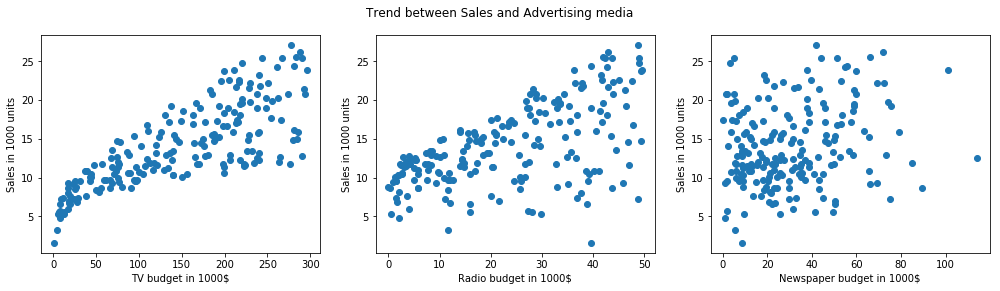

In [10]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
ax1.scatter(x=df['TV'],y=df['Sales'])
ax1.set_xlabel('TV budget in 1000$')
ax1.set_ylabel('Sales in 1000 units')


ax2.scatter(x=df['Radio'],y=df['Sales'])
ax2.set_xlabel('Radio budget in 1000$')
ax2.set_ylabel('Sales in 1000 units')

ax3.scatter(x=df['Newspaper'],y=df['Sales'])
ax3.set_xlabel('Newspaper budget in 1000$')
ax3.set_ylabel('Sales in 1000 units')

plt.suptitle('Trend between Sales and Advertising media')
plt.show()

Observations:
1. Increase in TV Advertising budget increases Sales
2. There is no relationship between Newspaper Advertising budget on the Sales

## Model Training ##

#### Lets implement manually Linear Regression using Single Predictor ####

The Objective is to obtain a function that applies a linear operation on the inputs and generates the target variable. To achieve this we will find the best values of the parameters ${\beta_0}$ (also called Bias or y intercept) and ${\beta_1}$ (also called X-intercept) that minimizes the loss between predicted and actual target.

$${Y = \beta_0 + \beta_1 * X}$$

The loss we aim to minimize here is **Residual Sum of Squares**. The principle is to reduce the squared difference between actual target and predicted target values by choosing favourable parameters.

$${RSS = (\bar{y_1} - \hat{\beta_0} -\hat{\beta_1}*x_1 ) + (\bar{y_2} - \hat{\beta_0} -\hat{\beta_2}*x_2 ) + ... (\bar{y_n} - \hat{\beta_0} -\hat{\beta_n}*x_n )}$$


Which is nothing but, summing up all the squared difference of actual and predicted target values

But how to chose the parameters? By applying calculus on the above formula one can find the following formula of both parameters. This derivation is kept out of the scope of book.

$${\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} } $$


$${\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}} $$

In [15]:
def roundDecimalsToFourPlaces(num):
    return round(num,4)

$${\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} } $$

In [17]:
def getCoefficientEstimate(data, predictorColName, responseColName):
    predictorMean = data[predictorColName].mean()
    responseMean = data[responseColName].mean()
    predictorValues = data[predictorColName].tolist()
    responseValues = data[responseColName].tolist()
    sumNumerator = 0
    sumDenominator = 0
    for i in range(0,len(responseValues)):
        sumNumerator = sumNumerator + (predictorValues[i] - predictorMean) * (responseValues[i] - responseMean)
        sumDenominator = sumDenominator + (predictorValues[i] - predictorMean) * (predictorValues[i] - predictorMean) 
    return roundDecimalsToFourPlaces(sumNumerator / sumDenominator)

$${\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}} $$

In [16]:
def getIntercept(data, predictorColName, responseColName, predictorEstimate):
    predictorMean = data[predictorColName].mean()
    responseMean = data[responseColName].mean()
    return roundDecimalsToFourPlaces(responseMean - predictorEstimate * predictorMean)

In [18]:
def getSimpleLinearRegressionFitParams(data, predictor, response):
    b1 = getCoefficientEstimate(data, predictor, response)
    b0 = getIntercept(data, predictor, response, b1)
    return (b0, b1)

$${Y = \beta_0 + \beta_1 * X}$$

In [19]:
def predictUsingSimpleLinearRegression(intercept, predictor, slopeOfPredictor):
    return roundDecimalsToFourPlaces(intercept + predictor * slopeOfPredictor)

$${RSS = (\bar{y_1} - \hat{\beta_0} -\hat{\beta_1}*x_1 ) + (\bar{y_2} - \hat{\beta_0} -\hat{\beta_2}*x_2 ) + ... (\bar{y_n} - \hat{\beta_0} -\hat{\beta_n}*x_n )}$$

In [24]:
def getResidualSumOfSquares(data, predictorColName, responseColName):
    predictorValues = data[predictorColName].tolist()
    responseValues = data[responseColName].tolist()
    predictorEstimate = getCoefficientEstimate(data,predictorColName,responseColName)
    intercept = getIntercept(data,predictorColName,responseColName,predictorEstimate)
    rss = 0
    n = len(responseValues)
    for i in range(0,n):
        rss = rss + math.pow((responseValues[i] - intercept - predictorEstimate * predictorValues[i]),2)
    return roundDecimalsToFourPlaces(rss)

Let us now assess how accurate are the parameters (also called co-efficent of estimates)

1. Standard Error: This metric tells us on average how much different are the parameters of the modeled function to the parameters of the True function

In [20]:
def getStandardErrorOfCoefficientEstimate(data, predictorColName, standardDeviation):
    variance = math.pow(standardDeviation,2)
    predictorMean = data[predictorColName].mean()    
    predictorValues = data[predictorColName].tolist()
    temp = 0
    n = len(predictorValues)
    for i in range(0,n):    
        temp = temp + math.pow((predictorValues[i] - predictorMean),2)
    standardError = variance / temp  
    return roundDecimalsToFourPlaces(math.sqrt(standardError))

In [21]:
def getStandardErrorOfIntercept(data, predictorColName, standardDeviation):
    variance = math.pow(standardDeviation,2)    
    predictorMean = data[predictorColName].mean()    
    predictorValues = data[predictorColName].tolist() 
    temp = 0
    n = len(predictorValues)
    for i in range(0,n):    
        temp = temp + math.pow((predictorValues[i] - predictorMean),2)
    standardError = variance * ((1 / n) + (math.pow(predictorMean,2) / temp))
    return roundDecimalsToFourPlaces(math.sqrt(standardError))

2 . Confidence Interval: Next, we find the confidence interval of the parameter values with a pre-define confidence level (95%). 95% confidence level means out of 100 observations 95 times, the true value will be in the confidence interval.

In [22]:
def getConfidenceIntervalWith95Perc(estimatedValue, standardError):
    return (estimatedValue - 2 * standardError, estimatedValue + 2 * standardError)

In [23]:
def getResidualStandardError(rss, n):
    return roundDecimalsToFourPlaces(math.sqrt(rss/(n-2)))

In [25]:
def getRSquare(data, responseColName, rss):
    responseValues = data[responseColName].tolist()
    responseMean = data[responseColName].mean()
    tss = 0 
    n = len(responseValues)
    for i in range(0,n):
        tss = tss + math.pow((responseValues[i] - responseMean),2)
    return roundDecimalsToFourPlaces(1 - (rss / tss))

In [26]:
def plotResidualVersusPredictor(data, predictorColName, responseColName):
    predictorValues = data[predictorColName].tolist()
    responseValues = data[responseColName].tolist()
    predictorEstimate = getCoefficientEstimate(data,predictorColName,responseColName)
    intercept = getIntercept(data,predictorColName,responseColName,predictorEstimate)
    rss = 0
    n = len(responseValues)
    residuals = []
    for i in range(0,n):
        residuals.append((responseValues[i] - intercept - predictorEstimate * predictorValues[i]))
    
    fig, (ax1) = plt.subplots(1,1)
    ax1.scatter(x=predictorValues,y=residuals)
    ax1.set_xlabel(predictorColName)
    ax1.set_ylabel('residuals')
    
    ax1.set_title('Resiudual against Predictor to check linearity')
    
    plt.show()

In [27]:
def performSimpleRegressionOnPredictor(data, predictor, response, testValue):
    n = data.shape[0]
    print('number of records',n)
    intercept, slopeOfPredictor = getSimpleLinearRegressionFitParams(data, predictor, response)
    print('Predictor {0} - Response {1}'.format(predictor, response))
    print('b0 : {0}'.format(intercept))
    print('b1 : {0}'.format(slopeOfPredictor))
    print('predicted y : {0}'.format(predictUsingSimpleLinearRegression(intercept, testValue, slopeOfPredictor)))
    rss = getResidualSumOfSquares(df,predictor,response)
    print('RSS : {0}'.format(rss))
    rse = getResidualStandardError(rss, n)    
    print('RSE : {0}'.format(rse))    
    standardErrorOfIntercept = getStandardErrorOfIntercept(data, predictor, rse)
    print('SE(b0) : {0}'.format(standardErrorOfIntercept))    
    standardErrorOfPredictorCoefficient = getStandardErrorOfCoefficientEstimate(df, predictor, rse)
    print('SE(b1) : {0}'.format(standardErrorOfPredictorCoefficient))
    confidenceIntervalOfIntercept = getConfidenceIntervalWith95Perc(intercept, standardErrorOfIntercept)
    print('95% Confidence Interval of b0:{0}'.format(confidenceIntervalOfIntercept))
    confidenceIntervalOfPredictor = getConfidenceIntervalWith95Perc(intercept, standardErrorOfPredictorCoefficient)
    print('95% Confidence Interval of b1:{0}'.format(confidenceIntervalOfPredictor))
    tStatisticsOfIntercept = roundDecimalsToFourPlaces(intercept / standardErrorOfIntercept)
    print('t-statistics(b0): {0}'.format(tStatisticsOfIntercept))
    tStatisticsOfPredictorCoefficient = roundDecimalsToFourPlaces(slopeOfPredictor / standardErrorOfPredictorCoefficient)
    print('t-statistics(b1): {0}'.format(tStatisticsOfPredictorCoefficient))
    #print('p-value: {0}'.format('??'))
    rSquare = getRSquare(data, response, rss)
    print('R2 : {0}'.format(rSquare))
    plotResidualVersusPredictor(data,predictor,response)

# TV

number of records 200
Predictor TV - Response Sales
b0 : 7.038
b1 : 0.0475
predicted y : 17.9678
RSS : 2102.5326
RSE : 3.2587
SE(b0) : 0.4578
SE(b1) : 0.0027
95% Confidence Interval of b0:(6.122400000000001, 7.9536)
95% Confidence Interval of b1:(7.0326, 7.0434)
t-statistics(b0): 15.3735
t-statistics(b1): 17.5926
R2 : 0.6119


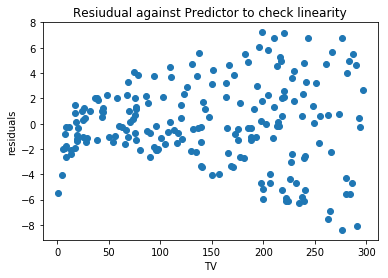

In [28]:
performSimpleRegressionOnPredictor(df,predictor='TV',response='Sales',testValue=230.1)

# Radio

number of records 200
Predictor Radio - Response Sales
b0 : 9.3115
b1 : 0.2025
predicted y : 12.349
RSS : 3618.4796
RSE : 4.2749
SE(b0) : 0.5629
SE(b1) : 0.0204
95% Confidence Interval of b0:(8.1857, 10.4373)
95% Confidence Interval of b1:(9.2707, 9.352300000000001)
t-statistics(b0): 16.542
t-statistics(b1): 9.9265
p-value: ??
R2 : 0.332


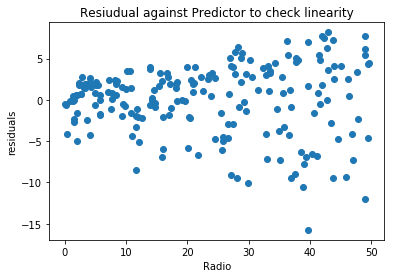

In [23]:
performSimpleRegressionOnPredictor(df,predictor='Radio',response='Sales',testValue=15)

# Newspaper

number of records 200
Predictor Newspaper - Response Sales
b0 : 12.3512
b1 : 0.0547
predicted y : 13.1717
RSS : 5134.8045
RSE : 5.0925
SE(b0) : 0.6214
SE(b1) : 0.0166
95% Confidence Interval of b0:(11.1084, 13.594000000000001)
95% Confidence Interval of b1:(12.318, 12.384400000000001)
t-statistics(b0): 19.8764
t-statistics(b1): 3.2952
p-value: ??
R2 : 0.0521


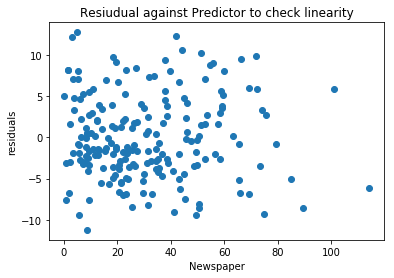

In [24]:
performSimpleRegressionOnPredictor(df,predictor='Newspaper',response='Sales',testValue=15)